STUDI KASUS DATA DEATH CLEAN

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv('death_clean.csv')
df.head()


,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2010,115,https://pusdatin.kemkes.go.id/download.php?fil...


TRANSFORM & SPLIT DATA

In [2]:
x = df[['Cause', 'Type']]
y = df[['Total Deaths']]

x_encoded = pd.get_dummies(x, columns=['Cause', 'Type'])

scaler = MinMaxScaler()
y_norm = scaler.fit_transform(y).ravel()

x_train, x_test, y_train, y_test = train_test_split(x_encoded, y_norm, test_size=0.3, random_state=42)

MODEL DECISION TREE

In [3]:
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred

array([0.12955149, 0.07946554, 0.04360056, 0.06153305, 0.10873093,
       0.10873093, 0.07946554, 0.        , 0.00803697, 0.0323488 ,
       0.        , 0.60970464, 0.07946554, 0.17862166, 0.41772152,
       0.07946554, 0.        , 0.60970464, 0.01054852, 0.0323488 ,
       0.03164557, 0.27707454, 0.30098453, 0.0121894 , 0.07946554,
       0.        , 0.        , 0.02756681, 0.10423504, 0.10423504,
       0.01172058, 0.        , 0.        , 0.07946554, 0.03248945,
       0.07946554, 0.60970464, 0.27707454, 0.08415377, 0.08415377,
       0.12955149, 0.        , 0.0140647 , 0.07946554, 0.03248945,
       0.35864979, 0.10873093, 0.10423504, 0.02390999, 0.10423504,
       0.03164557, 0.02208158, 0.        , 0.        , 0.01312705,
       0.00225035, 0.10873093, 0.10873093, 0.1203171 , 0.69057665,
       0.        , 0.        , 0.01898734, 0.28691983, 0.06153305,
       0.60970464, 0.19878106, 0.35864979, 0.10873093, 0.1203171 ,
       0.07946554, 0.        , 0.01312705, 0.00843882, 0.07946

R SCORE

In [4]:
score = model.score(x_test, y_test)
print("Decision Tree Score:", score)

Decision Tree Score: 0.7503779883924386


FEATURE IMPORTANCE

In [5]:
importances = model.feature_importances_

feature_names = x_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.head()

,Feature,Importance
0,Cause_AIDS,0.152764
24,Cause_Demam Berdarah Dengue (DBD),0.125555
34,Cause_Gangguan saluran napas lainnya yang berh...,0.086984
119,"Cause_Malformasi, Deformasi Kongenital & Kelai...",0.076848
108,Cause_Kronis Filariasis,0.063348


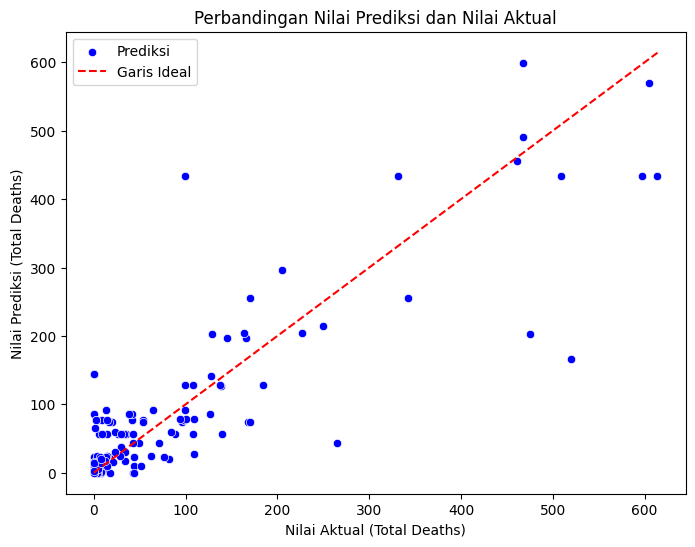

In [6]:
comparison_df = pd.DataFrame({
    'Actual': scaler.inverse_transform(y_test.reshape(-1, 1)).ravel(),
    'Predicted': scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
})

plt.figure(figsize=(8, 6))
sns.scatterplot(x=comparison_df['Actual'], y=comparison_df['Predicted'], color='blue', label='Prediksi')
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()], 
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()], 
         color='red', linestyle='--', label='Garis Ideal')

plt.title('Perbandingan Nilai Prediksi dan Nilai Aktual')
plt.xlabel('Nilai Aktual (Total Deaths)')
plt.ylabel('Nilai Prediksi (Total Deaths)')
plt.legend()
plt.show()


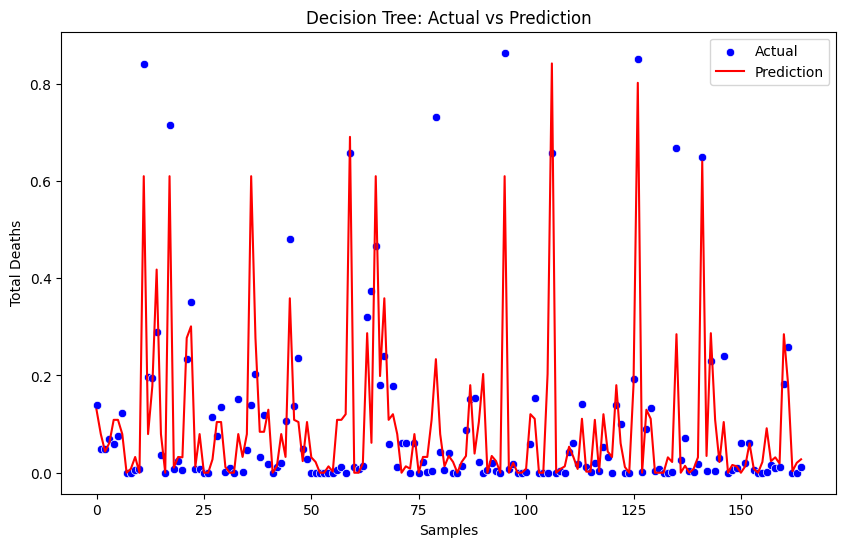

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(y_test)), y=y_test, color='blue', label='Actual')
sns.lineplot(x=range(len(y_test)), y=y_pred, color='red', label='Prediction')

plt.xlabel('Samples')
plt.ylabel('Total Deaths')
plt.title('Decision Tree: Actual vs Prediction')
plt.legend()
plt.show()

In [8]:
from graphviz import Digraph

dot = Digraph()
dot.node('A', 'Node A')
dot.node('B', 'Node B')
dot.edge('A', 'B', 'Edge from A to B')

dot.render('output_graph', format='png')

ModuleNotFoundError: No module named 'graphviz'

GRAPHVIZ

In [ ]:
import graphviz
from io import StringIO
from sklearn.tree import export_graphviz

x_encoded.columns = x_encoded.columns.str.replace('[^a-zA-Z0-9]', '_', regex=True)

dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 
                feature_names=x_encoded.columns,
                filled=True, rounded=True, special_characters=False)

graph = graphviz.Source(dot_data.getvalue())

graph.render("decision_tree", format='pdf')

graph.view()

Data Baru

In [10]:
test_data = pd.DataFrame({
    'Cause': ['Gempa Bumi', 'Banjir', 'Kebakaran', 'Tsunami', 'Angin Puting Beliung', 'Tanah Longsor'],
    'Type': ['Bencana Alam'] * 6,
})

In [ ]:
test_data_encoded = pd.get_dummies(test_data, columns=['Cause', 'Type'])

reference_columns = pd.get_dummies(x[['Cause', 'Type']]).columns
test_data_encoded = test_data_encoded.reindex(columns=reference_columns, fill_value=0)

predictions = model.predict(test_data_encoded)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).ravel().astype(int)
test_data['Total Deaths'] = predictions
test_data

DECISSION TREE CLASSIFIER

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

np.random.seed(42)
data_size = 200
age = np.random.randint(18, 60, size=data_size) 
income = np.random.randint(20000, 120000, size=data_size) 
education = np.random.randint(1, 5, size=data_size) 
purchase = np.random.randint(0, 2, size=data_size)

df = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Education': education,
    'Purchase': purchase
})

df

In [13]:
x = df[['Age', 'Income', 'Education']]
y = df['Purchase']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

In [ ]:
model = DecisionTreeClassifier(random_state=42,ccp_alpha=0.01)
model.fit(x_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(x_test)

# Evaluasi skor
score = model.score(x_test, y_test)
print("Decision Tree Score:", score)

In [ ]:
# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

DECISSION TREE REGRESSOR

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

df = pd.DataFrame({
    'Experience': np.random.randint(0, 6, size=50),
    'Education': np.random.randint(1, 4, size=50),
    'Salary': np.random.randint(2000000, 11000000, size=50)
})

x = df[['Experience', 'Education']]
y = df[['Salary']]

scaler_x = StandardScaler()
x_scaled = scaler_x.fit_transform(x)

scaler_y = StandardScaler()
y_norm = scaler_y.fit_transform(y).ravel()

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_norm, test_size=0.3, random_state=42)

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

importances = model.feature_importances_

feature_names = x.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

rf_score = model.score(x_test, y_test)

new_data = pd.DataFrame({
    'Experience': [1, 2, 5],
    'Education': [1, 3, 2]
})

prediction = model.predict(new_data)
prediction


In [ ]:
fig, axes = plt.subplots(1, 2) # (baris, kolom)

sns.boxplot(x='Experience', y='Salary', data=df, ax = axes[0])
axes[0].set_xlabel('Experience')

sns.boxplot(x='Education', y='Salary', data=df, ax = axes[1])
axes[1].set_xlabel('Education')

fig.tight_layout()
plt.show()